In [1]:
from cpclasses import *


In [2]:
points = torch.tensor([[0.5, 0], [1.0, 0], [1.5, 0], [0.5, 0.2], [1.0, 0.2], [1.5,0.7]])
points_rotated = torch.tensor([[0.433, 0.25], [0.866, 0.5], [1.299, 0.75], [0.333, 0.4232], [0.766, 0.6732], [0.949, 1.3562]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


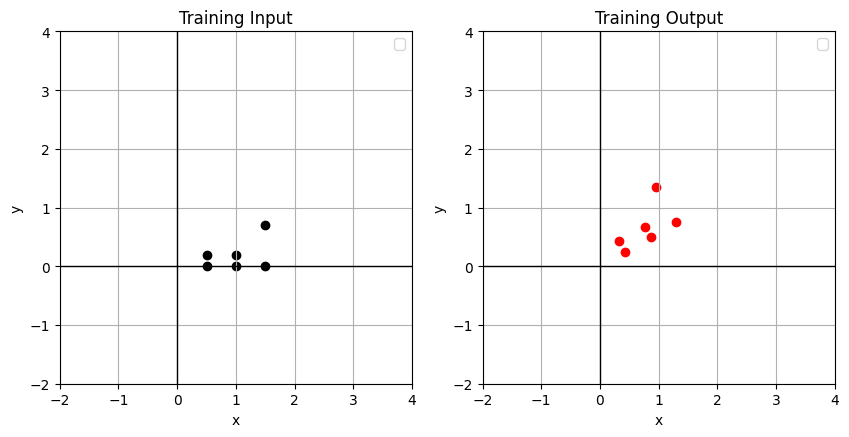

In [3]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(points[:,0], points[:,1], color='black')
coordinate_axes(ax[0])
format_axis(ax[0], title = 'Training Input')


ax[1].scatter(points_rotated[:,0], points_rotated[:,1], color='red')
coordinate_axes(ax[1])
format_axis(ax[1], title = 'Training Output')


for ax in ax:
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2, 4)

save_plot(fig, 'rotation_training_data')

In [4]:
model = Linear2x2NoBias()

model.fit(points, points_rotated, 1000, 0.01, optimizer = torch.optim.Adam)


Epoch 0 
 Loss: 0.9576075673103333
Epoch 500 
 Loss: 0.00033739337231963873


Text(0.5, 1.0, '2x2 without bias')

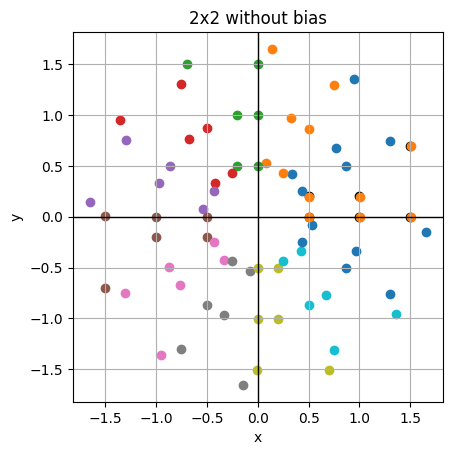

In [6]:
fig, ax  = plt.subplots()

ax.scatter(points[:,0], points[:,1], color='black', label='Input')
coordinate_axes(ax)

#ax.scatter(points_rotated[:,0], points_rotated[:,1], color='red', label='Output')

new_points = model(points)
for i in range(12):
    with torch.no_grad():
        ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
    new_points = model(new_points)

#print(f'Layer 1 weights: {weights[0]}')
#print(f'Layer 2 weights: {weights[1]}')


format_axis(ax, legend=False)
ax.set_title('2x2 without bias')

    

In [7]:
model = Linear2x2()

model.fit(points, points_rotated, 1000, 0.01, optimizer = torch.optim.Adam)


Epoch 0 
 Loss: 0.17434261739253998
Epoch 500 
 Loss: 1.320089268119773e-06


Text(0.5, 1.0, '2x2 with bias')

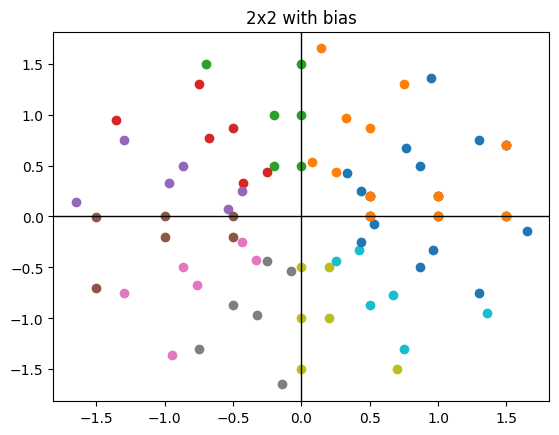

In [8]:
fig, ax  = plt.subplots()

ax.scatter(points[:,0], points[:,1], color='black', label='Input')
coordinate_axes(ax)

#ax.scatter(points_rotated[:,0], points_rotated[:,1], color='red', label='Output')

new_points = model(points)
for i in range(12):
    with torch.no_grad():
        ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
    new_points = model(new_points)


ax.set_title('2x2 with bias')

    

Epoch 0 
 Loss: 1.1189171075820923
Epoch 500 
 Loss: 1.3747888260695618e-05
Layer 1 weights: [[ 1.0502521  -0.46847636]
 [-0.25578302 -1.3783145 ]]
Layer 1 bias: [0.13686877 0.28541723]
Layer 2 weights: [[ 0.8431154   0.07619196]
 [ 0.29835883 -0.72971284]]
Layer 2 bias: [-0.13713825  0.16743648] 

Epoch 0 
 Loss: 0.12405535578727722
Epoch 500 
 Loss: 4.588921693945156e-15
Layer 1 weights: [[-0.6946483  -0.7825866 ]
 [-0.57597923  1.0942396 ]]
Layer 1 bias: [ 0.42818287 -0.2142127 ]
Layer 2 weights: [[-0.5447524  -0.84653854]
 [-0.86377704  0.17365438]]
Layer 2 bias: [0.05191437 0.40705356] 

Epoch 0 
 Loss: 0.29659196734428406
Epoch 500 
 Loss: 2.0576132825030936e-14
Layer 1 weights: [[ 1.2187185  -0.49795058]
 [-0.0736268  -1.0926425 ]]
Layer 1 bias: [-0.37593666  0.48552743]
Layer 2 weights: [[ 0.71844715  0.13018757]
 [ 0.35267517 -0.95329845]]
Layer 2 bias: [0.20688136 0.59543604] 



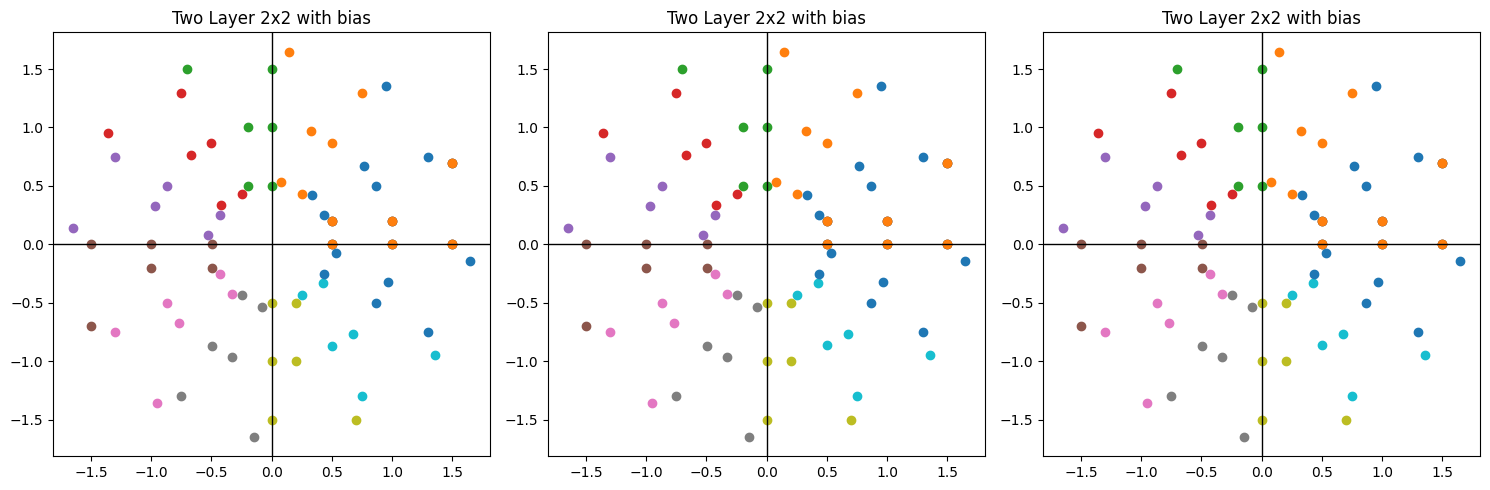

In [9]:
fig, axs  = plt.subplots(1,3, figsize=(15,5))

for ax in axs:
    model = TwoLinear2x2()

    model.fit(points, points_rotated, 1000, 0.01, optimizer = torch.optim.Adam)

    ax.scatter(points[:,0], points[:,1], color='black', label='Input')
    coordinate_axes(ax)

    weights = [model.layer1.weight.detach().numpy(), model.layer2.weight.detach().numpy()]
    bias = [model.layer1.bias.detach().numpy(), model.layer2.bias.detach().numpy()]

    #ax.scatter(points_rotated[:,0], points_rotated[:,1], color='red', label='Output')

    new_points = model(points)
    for i in range(12):
        with torch.no_grad():
            ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
        new_points = model(new_points)
    

    ax.set_title('Two Layer 2x2 with bias')
    print(f'Layer 1 weights: {weights[0]}')
    print(f'Layer 1 bias: {bias[0]}')
    print(f'Layer 2 weights: {weights[1]}')
    print(f'Layer 2 bias: {bias[1]} \n')
fig.tight_layout()

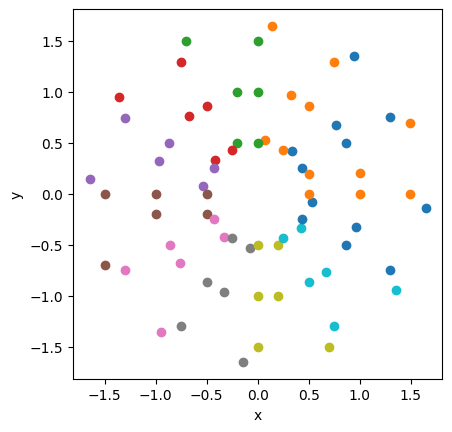

In [13]:
fig, ax = plt.subplots()

for i in range(12):
        with torch.no_grad():
            ax.scatter(new_points[:,0], new_points[:,1], color=f'C{i}')
        new_points = model(new_points)

ax.set_aspect('equal')
ax.set(xlabel='x', ylabel='y')

save_plot(fig, 'rotation_modelled.png')